# Sign Language

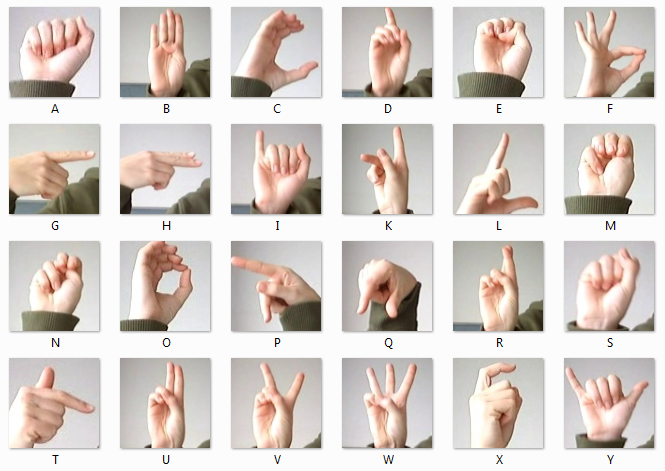

In [12]:
from IPython.display import Image
Image("../input/amer_sign2.png")

# About the data

In [13]:
# Load theDataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train = pd.read_csv('../input/sign_mnist_train.csv')
test = pd.read_csv('../input/sign_mnist_test.csv')

In [16]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0     153    ...          207       207       207       207       206   
1     158    ...           69       149       128        87        94   
2     187    ...          202       201       200       199       198   
3     210    ...          235       234       233       231       230   
4     185    ...           92       105       105       108       133   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0       206       206       204       203       202  
1       163       175       103       135       149  
2       199       198       195       194       195  
3       226       225       222       229       163  
4       163       157       163       164       179  

[5 rows x 785 columns]

In [17]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

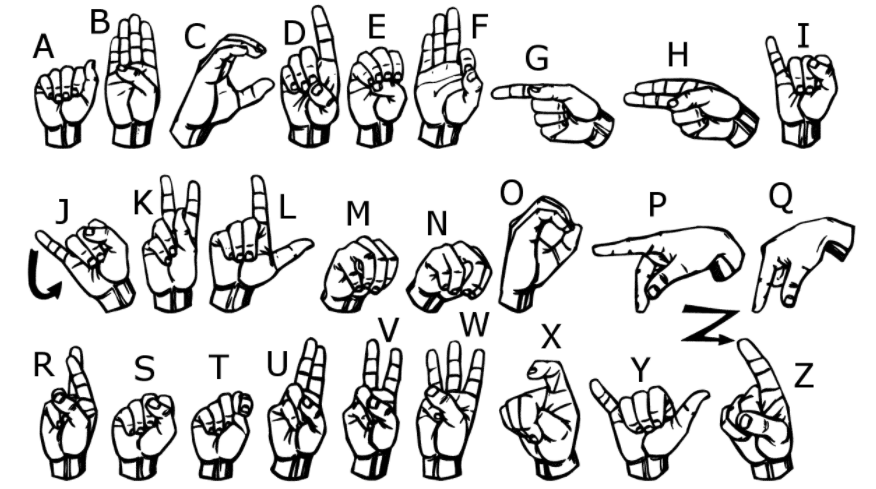

In [18]:
Image("../input/american_sign_language.PNG")

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [19]:
labels = train['label'].values

In [20]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# Data exploration

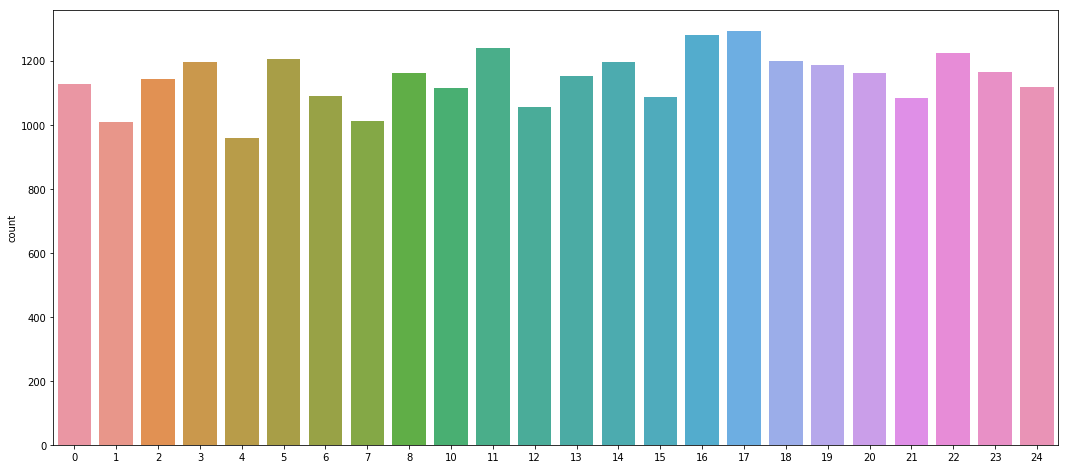

In [21]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

As you can see each one is almost equally distributed

In [22]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [23]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [24]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [25]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Lets see how the images look

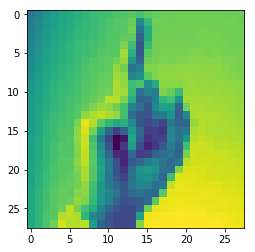

In [26]:
plt.imshow(images[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Creating the batch size to 128 and using 50 epochs

In [49]:
batch_size = 128
num_classes = 24
epochs = 50

Normalizing the training and test data

In [50]:
x_train = x_train / 255
x_test = x_test / 255

In [51]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [52]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

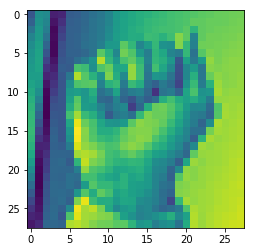

In [34]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [54]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [55]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 11s 547us/step - loss: 2.3481 - acc: 0.2795 - val_loss: 1.2860 - val_acc: 0.5886
Epoch 2/50
19218/19218 [==============================] - 1s 68us/step - loss: 1.0234 - acc: 0.6531 - val_loss: 0.6559 - val_acc: 0.7896
Epoch 3/50
19218/19218 [==============================] - 1s 61us/step - loss: 0.6059 - acc: 0.7940 - val_loss: 0.4288 - val_acc: 0.8637
Epoch 4/50
19218/19218 [==============================] - 1s 62us/step - loss: 0.3784 - acc: 0.8737 - val_loss: 0.2574 - val_acc: 0.9173
Epoch 5/50
19218/19218 [==============================] - 1s 61us/step - loss: 0.2503 - acc: 0.9188 - val_loss: 0.1188 - val_acc: 0.9752
Epoch 6/50
19218/19218 [==============================] - 1s 61us/step - loss: 0.1578 - acc: 0.9510 - val_loss: 0.0772 - val_acc: 0.9830
Epoch 7/50
19218/19218 [==============================] - 1s 61us/step - loss: 0.1119 - acc: 0.9665 - val_loss: 0.0465 - val_ac

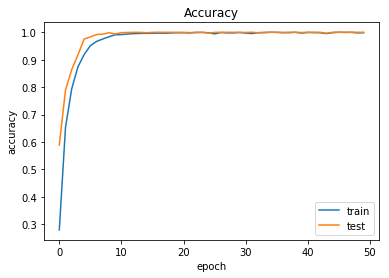

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

As you can see, the number of epochs increase the accuracy also increases.

Let's validate with the test data

In [39]:
test_labels = test['label']

In [40]:
test.drop('label', axis = 1, inplace = True)

In [41]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [42]:
test_labels = label_binrizer.fit_transform(test_labels)

In [56]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [44]:
test_images.shape

(7172, 28, 28, 1)

Predecting with test images

In [45]:
y_pred = model.predict(test_images)

In [57]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(test_labels, y_pred.round())

0.8895705521472392

As we can see we got a really great accuracy 

In [ ]:
# As We Got the Sign Lnguage prediction ther have find the best accuracy of signs.
# <Made By Sushmitha Reddy>

We can increate the accuracy by tuning the hyper parameters of the model like playing with different activation functions and using different loss functions